# **Проект: интернет-магазин «Стримчик»**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й

**Содержание:** <a class="anchor" id="0-bullet"></a>

1. [Загрузка данных](#1-bullet)
2. [Предобработка данных](#2-bullet)  
    2.1 [Исправление названия колонок](#2.1-bullet)   
    2.2 [Изменение типов данных](#2.2-bullet)   
    2.3 [Проверка датафрема на дубликаты](#2.3-bullet)      
    2.4 [Работа с пропусками](#2.4-bullet)  
    2.5 [Общие продажи по регионам](#2.5-bullet)
3. [Исследовательский анализ данных](#3-bullet)  
    3.1 [Выпуск игр в зависимости от года](#3.1-bullet)  
    3.2 [Зависимость продаж от платформы](#3.2-bullet)  
    3.3 [Актуальный период](#3.3-bullet)  
    3.4 [Какие платформы лидируют по продажам, растут или падают?](#3.4-bullet)  
    3.5 [Глобальные продажи игр в разбивке по платформам](#3.5-bullet)  
    3.6 [Как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков](#3.6-bullet)  
    3.7 [Как влияют на продажи отзывы пользователей и критиков для других платформ.](#3.7-bullet)  
    3.8 [Общее распределение игр по жанрам.](#3.8-bullet)  
4. [Составьте портрет пользователя каждого региона](#4-bullet)  
    4.1 [Самые популярные платформы (топ-5)](#4.1-bullet)  
    4.2 [Самые популярные жанры (топ-5)](#4.2-bullet)  
    4.3 [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#4.3-bullet)      
5. [Проверьте гипотезы](#5-bullet)  
    5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1-bullet)  
    5.2 [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2-bullet)   
6. [Общий вывод](#6-bullet)  

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Имортирование необходимых для анализа библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy import stats as st

<a class="anchor" id="1-bullet"></a>
## Загрузка данных

Загрузка CSV файлов в Jupyter notebook

In [2]:
try:
    df = pd.read_csv("C:\\Data-science\\ds_csv\\games.csv")
except:
    try:
        df = pd.read_csv("//datasets//games.csv")
    except:
        raise FileNotFoundError    

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Очень хорошо, что используется код двойной загрузки, локально и с сервера. Часто в проектах возникают ошибки именно из-за не правильного пути к датасету.</font>

Вывод информации и первых 5 строк о датафрейме

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод статистической сводки для каждого столбца датафрейме

In [4]:
df.describe().round(3)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


Определение процента пропусков в датафрейме

In [5]:
print("\033[1mПроцент пропусков от всего датасета:\033[0m")
print()
formatted_output = df.isna().mean().sort_values(ascending=False).apply(lambda x: "{:.1%}".format(x))
print(formatted_output)

Процент пропусков от всего датасета:

Critic_Score       51.3%
Rating             40.5%
User_Score         40.1%
Year_of_Release     1.6%
Name                0.0%
Genre               0.0%
Platform            0.0%
NA_sales            0.0%
EU_sales            0.0%
JP_sales            0.0%
Other_sales         0.0%
dtype: object


**Выводы**:
- Некорректные название столбцов, (не удволетворяют форомату snake_case)
- Столбцы `Year_of_Release`, `User_Score` имеют не подходящий тип данных.
- Имеется большое кол-во пропусков в колонках `Critic_Score` (51.3% пропусков), `Rating` (40.1% пропусков), `User_Score` (40.1% пропусков), `Year_of_Release` (1.6% пропусков).

<a class="anchor" id="2-bullet"></a>
## Предобработка данных

<a class="anchor" id="2.1-bullet"></a>
### Исправление названия колонок

In [6]:
# Приведение названий колонок к нижнему регистру
df.columns = df.columns.str.lower()
# Проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведение названия колонок к формату snake_case прошло успешно

<a class="anchor" id="2.2-bullet"></a>
### Изменение типов данных

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Т.е. TBD и Nan для нашего анализа имеет одинаковое значение. поэтому заменим все TBD на Nan.

In [8]:
# Замена tbd на Nan
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [9]:
# Изменение типов данных
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('Int64')
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Для столбцов `user_score`, `year_of_release` были изменены типы данных. Данные столбца `user_score` - это числа и пропуски (Nan) поэтому для дальнейшего анализа было принято решение поменять тип данных с `object` на `float64`, что поможет в дальнейшем применять к этому столбцу методы (median, sum, mean, ...).   
Данные столбца `year_of_release` - это время (год выпуска). Оно не бывает дробным, поэтому его можно перевести в формат `Int64` поддерживающий пропуски (Nan).

<a class="anchor" id="2.3-bullet"></a>
### Проверка датафрема на дубликаты

**Явные**

In [10]:
print('Явных дубликатов: ' if df.duplicated().sum() > 0 else 'Явных дубликатов НЕТ')

Явных дубликатов НЕТ


**Неявные**

In [11]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов платформ не обнаружено

In [12]:
# Функция для очистки названия
def clean_name(row):
    if pd.isna(row['name']):
        return row['name']  # Вернуть NaN без изменений
    return re.sub(r'[^а-яА-ЯёЁa-zA-Z ]', '', row['name']).strip().lower()

# Создаем новую очищенную колонку
df['name'] = df.apply(clean_name, axis=1)

# Посмотрим количество дублей по составному ключу `очищенное название - платформа - год выпуска`
df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)] \
.sort_values(['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14944,atari flashback classics volume,PS4,2016,Misc,0.02,0.00,0.00,0.00,NaN,NaN,E
15056,atari flashback classics volume,PS4,2016,Misc,0.02,0.00,0.00,0.00,NaN,NaN,E
15364,atari flashback classics volume,XOne,2016,Misc,0.02,0.00,0.00,0.00,NaN,NaN,E
15401,atari flashback classics volume,XOne,2016,Misc,0.02,0.00,0.00,0.00,NaN,NaN,E
10469,brain quest grades,DS,2008,Misc,0.10,0.00,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,yakuza,PS3,2012,Action,0.00,0.00,0.11,0.00,NaN,NaN,NaN
6202,yugioh world championship,DS,2007,Strategy,0.13,0.02,0.12,0.01,NaN,NaN,NaN
13328,yugioh world championship,DS,2007,Strategy,0.00,0.01,0.04,0.00,NaN,NaN,NaN
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [13]:
# Проверка до
before = df.shape[0]
# Удаляем дубликаты по составному ключу
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)
# Проверка после
after = df.shape[0]
print(f'Было удалено {before - after} строк')

# посмотрим оставшееся количество дублей по составному ключу `название - платформа`
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

Было удалено 113 строк


0

**Вывод:** В ходе обработки неявных пропусков было удалено 113 строк

<a class="anchor" id="2.4-bullet"></a>
### Работа с пропусками

Пропуски в стобцах `name` и `genre`

In [14]:
df.query('name.isnull() | genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
658,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуски в столбце `name` и `genre` невозможно заполнить какими либо данными, а сами строки не несут смысловой нагрузки, поэтому их можно удалить

In [15]:
# Количество строк до удаления
display(df.shape[0]) 
# Удаление строк, где есть пропуски в столбцах 'name' и 'genre'
df = df.dropna(subset=['name', 'genre'])
# Количество строк после удаления
df.shape[0]

16602

16601

Пропуски в стобце `year_of_release`

Пропущенные значения в столбце `year_of_release` имеют очень редкий характер (1.6 % от всего датасета), а также сложную логику, поэтому заполнить эти значения не представляется возможным. Для улучшения качества датафрейма строки с данными пропусками лучше удалить. Это не повлияет на общий анализ.

In [16]:
# Количество строк до удаления
display(df.shape[0])
df = df.dropna(subset=['year_of_release'])
# Количество строк после удаления
df.shape[0]

16601

16333

`critic_score`, `user_score`, `rating`.

In [17]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Основные категории рейтингов ESRB:**
- EC (Early Childhood) – Для детей младшего возраста (от 3 лет и старше). Эти игры не содержат материалов, неподходящих для младенцев и маленьких детей.   
- E (Everyone) – Для всех (от 6 лет и старше). Игры с рейтингом E могут включать минимальное количество мультяшного насилия и фантастического контента.   
- E10+ (Everyone 10 and Older) – Для всех от 10 лет. Эти игры могут содержать больше мультяшного или фантастического насилия, нежели игры с рейтингом E, а также небольшой контент с намёком на грубый язык.   
- T (Teen) – Для подростков (от 13 лет и старше). Игры с рейтингом T могут содержать насилие, грубый язык, некоторую тему для взрослых и минимальный контент с кровью.   
- M (Mature) – Для взрослых (от 17 лет и старше). Игры с рейтингом M могут включать интенсивное насилие, сексуальные темы, кровь, грубый язык и сцены наркотического употребления.   
- AO (Adults Only) – Только для взрослых (от 18 лет и старше). Эти игры содержат экстремальное насилие, сексуальные сцены или другие материалы, которые считаются неподходящими для детей и подростков.   
- RP (Rating Pending) – Рейтинг ожидается. Этот рейтинг временно используется для игр, которые еще не прошли оценку ESRB.

Можно сделать вывод, что RP и Nan идентичны по смыслу, поэтому заменим все рейтинги Nan на no_ESRB.    

**Пропуски в столбце `rating`** могли быть вызваны тем, что ESRB - это рейтинг для США и Канады. Если игра не предназначалась для этих стран, то мог использоваться другой рейтинг, например: PEGI (Pan-European Game Information) — Европа.

K-A (Kids to Adults) — это устаревший рейтинг, который использовался в системе ESRB (Entertainment Software Rating Board) с момента её создания в 1994 году до 1997 года. Рейтинг обозначал, что игра подходит для детей и взрослых, то есть для всех возрастов (с 1997 заменен на E).

In [18]:
# Замена рейтингов
df['rating'] = df['rating'].replace(np.NaN, 'no_ESRB')
df['rating'] = df['rating'].replace('K-A', 'E')
# Проверка
df['rating'].unique()

array(['E', 'no_ESRB', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

`critic_score`, `user_score`, `rating`. Пропусков в этих датафреймов очень много `сritic_score` (51.3% пропусков), `rating` (40.1% пропусков), `user_score` (40.1% пропусков). Замена пропусков на медианное занчение для количественных параметров столбцов `critic_score`, `user_score` сильно повлияет на результат анализа. Поэтому для этих столбцов принято решение оставить пропуски как есть.  
Для столбца `rating`. Замена пропусков в категориальных переменных без дополнительной информации не представляется возможной. Поэтому для этих столбцов принято решение заменить пропуски на заглушку no_ESRB.

**Причины появления пропусков для столбцов `critic_score`, `user_score`**

In [19]:
# Отображение примеров строк с пропусками в 'critic_score' и 'user_score'
display(df.query('user_score.isnull() & critic_score.isnull()').sample(5))
# Отображение примеров строк с пропусками только в 'user_score'
display(df.query('user_score.isnull() & critic_score.notnull()').sample(5))
# Отображение примеров строк с пропусками только в 'critic_score'
df.query('user_score.notnull() & critic_score.isnull()').sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7104,in party megamix wii,Wii,2009,Misc,0.19,0.01,0.00,0.02,NaN,NaN,no_ESRB
6465,gundam battle universe,PSP,2008,Fighting,0.00,0.00,0.26,0.00,NaN,NaN,no_ESRB
778,golf,GB,1989,Sports,0.83,0.33,0.92,0.04,NaN,NaN,no_ESRB
3339,beatmania append rdmix,PS,1998,Simulation,0.00,0.00,0.56,0.04,NaN,NaN,no_ESRB
950,jet moto,PS,1996,Racing,1.33,0.40,0.03,0.07,NaN,NaN,no_ESRB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13887,the ripping friends,GBA,2002,Action,0.03,0.01,0.0,0.00,38.0,NaN,E
8172,open season,GC,2006,Platform,0.13,0.03,0.0,0.00,59.0,NaN,E10+
9316,syberia,DS,2008,Action,0.10,0.02,0.0,0.01,52.0,NaN,T
11974,dave mirra bmx challenge,Wii,2007,Sports,0.06,0.00,0.0,0.01,36.0,NaN,E
15338,jake hunter detective chronicles,DS,2008,Adventure,0.02,0.00,0.0,0.00,47.0,NaN,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15187,unreal anthology,PC,2006,Shooter,0.00,0.02,0.00,0.00,NaN,8.8,M
2769,fifa,PS3,2016,Sports,0.05,0.55,0.03,0.10,NaN,3.3,E
10756,lego star wars the force awakens,PSV,2016,Action,0.01,0.06,0.01,0.02,NaN,7.1,E10+
4705,nba k,PS2,2008,Sports,0.34,0.01,0.00,0.06,NaN,8.0,E
12462,digimon allstar rumble,X360,2014,Fighting,0.05,0.01,0.00,0.01,NaN,5.7,E10+


Для `critic_score`, `user_score` не нашлось какой-то логики причины пояление пропусков. Вероятно данные пропуски связаны с тем, что эти игры не оценивались критиками, пользователями или всеми сразу.

<a class="anchor" id="2.5-bullet"></a>
###  Общие продажи по регионам

In [20]:
# Найдем общие продажи по регионам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#Проверка
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon redpokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38


**Вывод:**
- Заменил названия столбцов (привел к нижнему регистру);
- Преобразовал данные в нужные типы. Описал, в каких столбцах заменил тип данных и почему;
- Посчитал общие продажи по регионам;
- Обработал пропуски там где это возможно.

In [21]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16333 entries, 0 to 16601
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16333 non-null  object 
 1   platform         16333 non-null  object 
 2   year_of_release  16333 non-null  Int64  
 3   genre            16333 non-null  object 
 4   na_sales         16333 non-null  float64
 5   eu_sales         16333 non-null  float64
 6   jp_sales         16333 non-null  float64
 7   other_sales      16333 non-null  float64
 8   critic_score     7947 non-null   float64
 9   user_score       7430 non-null   float64
 10  rating           16333 non-null  object 
 11  total_sales      16333 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['' 'a boy and his blob' 'a bugs life' ... 'zumba fitness world party'
 'zwei' 'zyuden sentai kyoryuger game de gaburincho']
name : кол-во NaN 0 , пр

<a class="anchor" id="3-bullet"></a>
## Исследовательский анализ данных

<a class="anchor" id="3.1-bullet"></a>
### Выпуск игр в зависимости от года

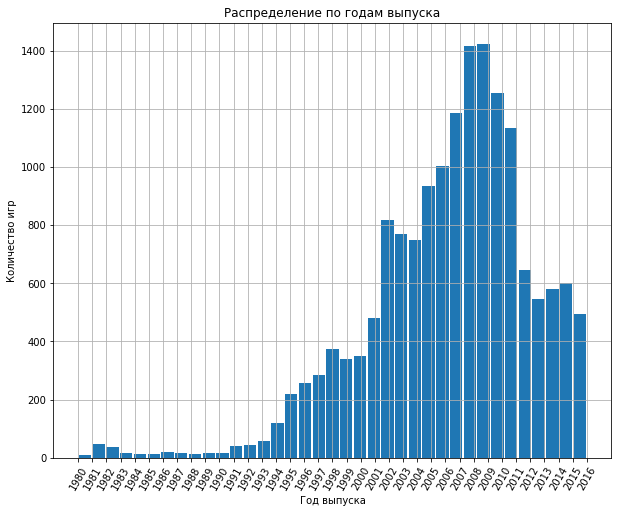

In [22]:
df['year_of_release'].plot(
    kind='hist',
    bins=37,
    rwidth=0.9,
    grid=True,
    figsize=(10, 8)
)

# Настройки графика
plt.title('Распределение по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

# Настройка меток оси X
years = np.arange(df['year_of_release'].min(), df['year_of_release'].max() + 1)
plt.xticks(years, rotation=60)

# Показ графика
plt.show()

In [23]:
def avg_games_per_era(df, eras):
    # Создаем список для хранения средних значений по эпохам
    avg_games = []
    
    # Цикл по эпохам
    for start_year, end_year in eras:
        # Фильтруем данные по текущей эпохе
        era_data = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= end_year)]
        
        # Рассчитываем количество лет в эпохе
        num_years = end_year - start_year + 1
        
        # Считаем количество игр и среднее количество игр за год
        total_games = len(era_data)
        avg_per_year = total_games / num_years
        
        # Добавляем результат в список
        avg_games.append((start_year, end_year, avg_per_year))
    
    return avg_games

# Определение эпох (start_year, end_year)
eras = [
    (1980, 1993),
    (1994, 2001),
    (2002, 2011),
    (2012, 2016)
]

# Вызов функции для подсчета среднего количества игр по эпохам
averages = avg_games_per_era(df, eras)

# Вывод результатов
for start_year, end_year, avg in averages:
    print(f"Среднее количество игр с {start_year} по {end_year}: {avg:.0f} игр в год")

Среднее количество игр с 1980 по 1993: 26 игр в год
Среднее количество игр с 1994 по 2001: 303 игр в год
Среднее количество игр с 2002 по 2011: 1069 игр в год
Среднее количество игр с 2012 по 2016: 572 игр в год


**Вывод:** На графике можно заметить 4 эры игровой индустрии:

- с 1980 по 1993 год наблюдалась эра зарождения игровой индустрии, игры начали появляться на полках магазина, но спрос на них был слабым, среднее количество игр на полках 26 штук в год;  
- с 1994 по 2001 год наблюдалась эра рассвета, спрос на игры начал расти и на полках магазинов количество игр увеличиось ~ в 10 раз, а среднее количество игр на полках стало 305 штук в год;  
- с 2002 по 2011 год наблюдался эра процветания, спрос на игры был наивысшим за всю историю, среднее количество игр на полках 1075 штук в год, а пик пришелся на 2008 и 2009 год, когда на полках лежало более 1400 игр за год;  
- с 2012 по 2016 год наблюдается эра спада, спрос на игры снизился, среднее количество игр на полках состовляет 577 штук в год.  

Если анализ требует понимания исторического контекста, долгосрочных трендов или сравнения с прошлыми периодами, данные за все эры будут важны. Однако, если цель анализа — текущие или недавние тренды, то можно сосредоточиться на данных за последние несколько лет.

<a class="anchor" id="3.2-bullet"></a>
### Зависимость продаж от платформы

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

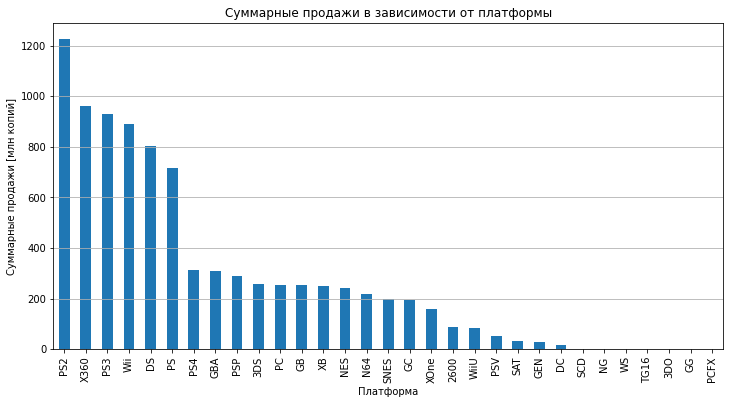

In [24]:
# Создаем сводную таблицу
sales_by_platforms = df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum'  # Мы используем функцию sum для агрегирования
)

# Сортируем по общим продажам (total_sales)
sales_by_platforms = sales_by_platforms.sort_values(
    by='total_sales',
    ascending=False,
)

# Построение графика
sales_by_platforms.plot(
    kind='bar',
    legend=False,
    figsize=(12, 6),
)

# Настройки графика
plt.title('Суммарные продажи в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи [млн копий]')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Показ графика
plt.show()

Наибольшие суммарные продажи у 6-ти платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`.

In [25]:
# Сохраняем 6 наиболее продаваемых платформ в список
top_6_platforms = sales_by_platforms.head(6).index.tolist()

# Создаем новый датафрейм для 6 наиболее продаваемых платформ
top_platform_df = df.query('platform in @top_6_platforms')

# Построим сводную таблицу для нового датафрейма
top_platforms_by_years = top_platform_df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Проверка
top_platforms_by_years.head()

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,93.55,NaN,NaN,NaN,NaN
1997,NaN,131.70,NaN,NaN,NaN,NaN


В ходе проверки был замечен выброс, Nintendo DS была выпущена в 2004 году, а не как не в 1985. Удалим этот выброс

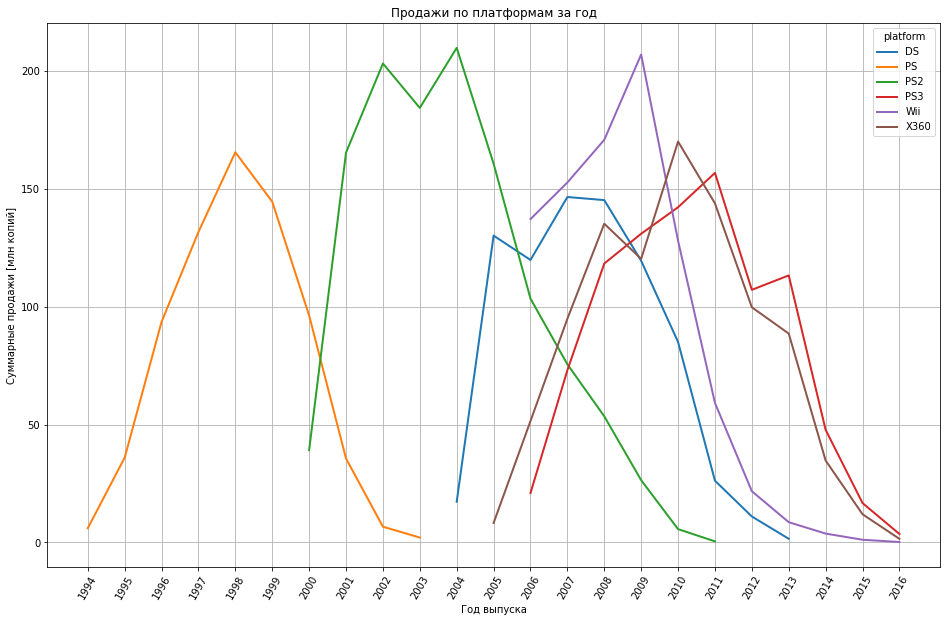

In [26]:
# Фильтрация данных с 1994 по 2016 год
top_platforms_by_years = top_platforms_by_years.loc[1994:2016]

# Построение графика
top_platforms_by_years.plot(figsize=(16, 10), linewidth=2)

# Настройки графика
plt.title('Продажи по платформам за год')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи [млн копий]')
plt.grid(True)
# Настройка меток оси X
years = np.arange(
    top_platforms_by_years.index.min(), 
    top_platforms_by_years.index.max() + 1
)
plt.xticks(years, rotation=60)

# Показ графика
plt.show()

In [27]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [28]:
# Срок жизни для платформ начиная с 1994 года
time_life = temp.query('year_of_release > 1993') \
    .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']) \
    .reset_index()

time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

6.0

**Вывод:** Примерный срок жизни платформы 7 лет.

<a class="anchor" id="3.3-bullet"></a>
### Актуальный период

Для формирования актуального периода для анализа 2017 года, нужно учесть 2 фактора:

- 1-й рассматривать нужно период длительностью 7 лет, т.к. примерно столько живет платформа;  
- 2-й важно для анализа учитывать эру игровой индустрии, т.к. в разных эрах сильно различается количество продаж (п. 3.1). Если брать интервал затрагивающий несколько эпох, плохо повлияет на рассмотрение определенного года, тренды предыдущих эпох искозят результаты анализа.

**Подведя итоги:** Для анализа 2017 года, нужно рассмотреть период с 2012 по 2016 год.

In [29]:
# Фильтруем игры, вышедшие в 2012 году или позже
actual_df = df.query('year_of_release >= 2012').reset_index(drop=True)

# Выведем информацию и первые пять строк нового датафрейма
actual_df.info()
actual_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2862 non-null   object 
 1   platform         2862 non-null   object 
 2   year_of_release  2862 non-null   Int64  
 3   genre            2862 non-null   object 
 4   na_sales         2862 non-null   float64
 5   eu_sales         2862 non-null   float64
 6   jp_sales         2862 non-null   float64
 7   other_sales      2862 non-null   float64
 8   critic_score     1308 non-null   float64
 9   user_score       1526 non-null   float64
 10  rating           2862 non-null   object 
 11  total_sales      2862 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 271.2+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty black ops,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
3,pokemon xpokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_ESRB,14.60
4,call of duty black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<a class="anchor" id="3.4-bullet"></a>
### Какие платформы лидируют по продажам, растут или падают?

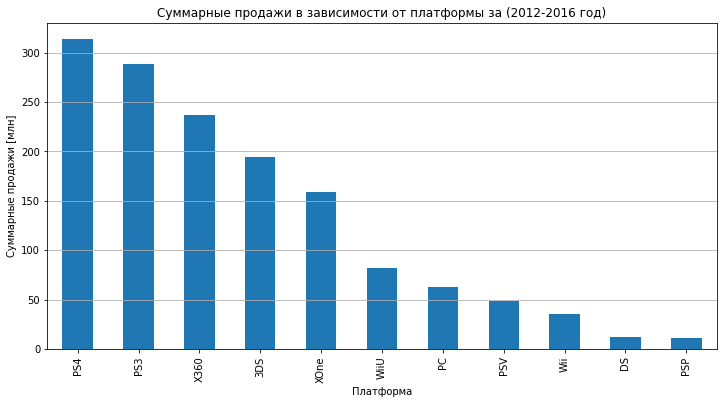

In [30]:
#  на продажи по этим платформам
actual_platforms_sales = actual_df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum'
)

actual_platforms_sales.columns = ['sum']

actual_platforms_sales = actual_platforms_sales.sort_values('sum', ascending = False)

actual_platforms_sales.plot(
    kind='bar', 
    legend=False, 
    figsize=(12, 6)
)


# Настройки графика
plt.title('Суммарные продажи в зависимости от платформы за (2012-2016 год)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи [млн]')
plt.xticks(rotation=90)
plt.grid(axis='y')

Для определения в какой фазе находится платформа построим график зависимости суммарных продаж для разных платформ по годам

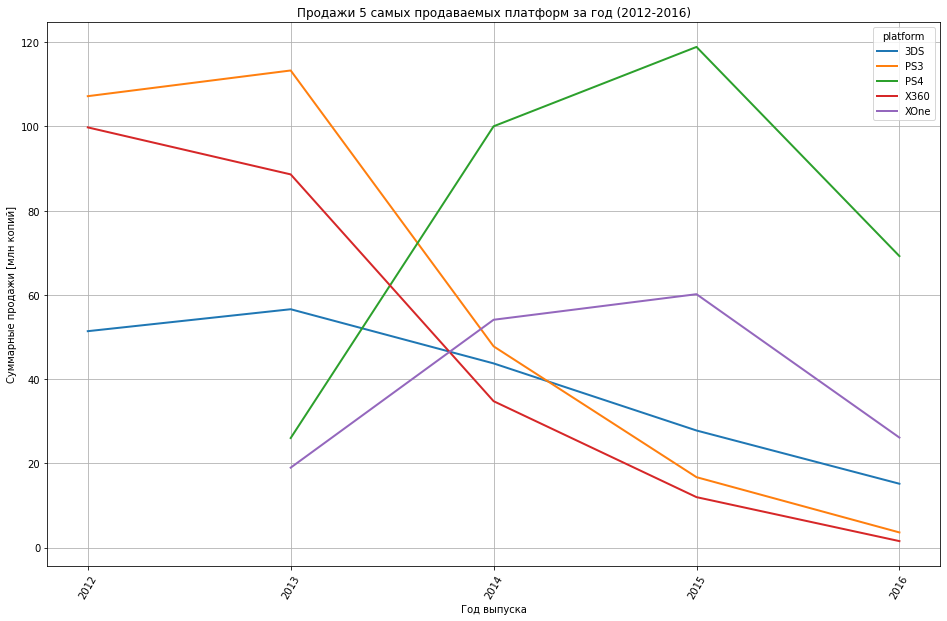

In [31]:
# Определение 5 самых продаваемых платформ
top_5_platforms = (
    actual_df.groupby('platform')['total_sales']
    .sum()
    .nlargest(5)
    .index.tolist()
)

# Фильтрация данных для 5 самых продаваемых платформ
top_platforms_df = actual_df.query('platform in @top_5_platforms')

# Построение графика для 5 самых продаваемых платформ
(
    top_platforms_df.pivot_table(index='year_of_release',
                                 columns='platform', 
                                 values='total_sales', 
                                 aggfunc='sum'
                                )
    .plot(figsize=(16, 10), linewidth=2)
)

# Настройки графика
plt.title('Продажи 5 самых продаваемых платформ за год (2012-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи [млн копий]')
plt.grid(True)

# Настройка меток оси X
plt.xticks(np.arange(2012, 2017), rotation=60)

# Показ графика
plt.show()

**Вывод:** Из всех платформ потенциально наиболее прибыльными являются **PS4** и **XOne**, т.к. эти платформы были выпущены в 2013 году (учитывая жизнь платформы ~ 10 лет) и на 2016 год имеют наибольшие показатели по продажам.   
Платформы **PS3** и **X360** идут к своему закату и не смотря на хорошие итоговые продажи с 2012 года, заметен сильный ниспадающий тренд.

<a class="anchor" id="3.5-bullet"></a>
### Глобальные продажи игр в разбивке по платформам

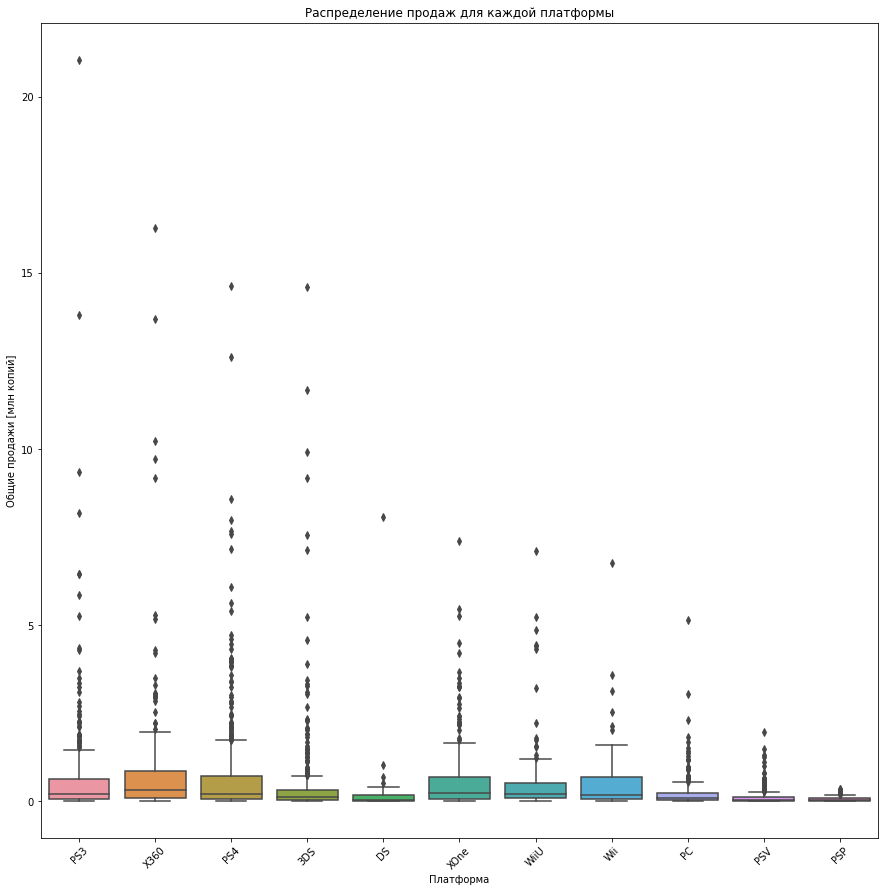

In [32]:
# Строим коробчатую диаграмму (boxplot) для отображения распределения продаж по платформам
f, ax = plt.subplots(figsize=(15, 15))  # Создаем фигуру и ось

fig = sns.boxplot(x='platform', y='total_sales', data=actual_df, ax=ax)

# Настройки графика
fig.set_title("Распределение продаж для каждой платформы")

# Задание название осей
ax.set_xlabel("Платформа")
ax.set_ylabel("Общие продажи [млн копий]")

# Поворачиваем подписи на оси X (названия платформ) на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

# Показ графика
plt.show()

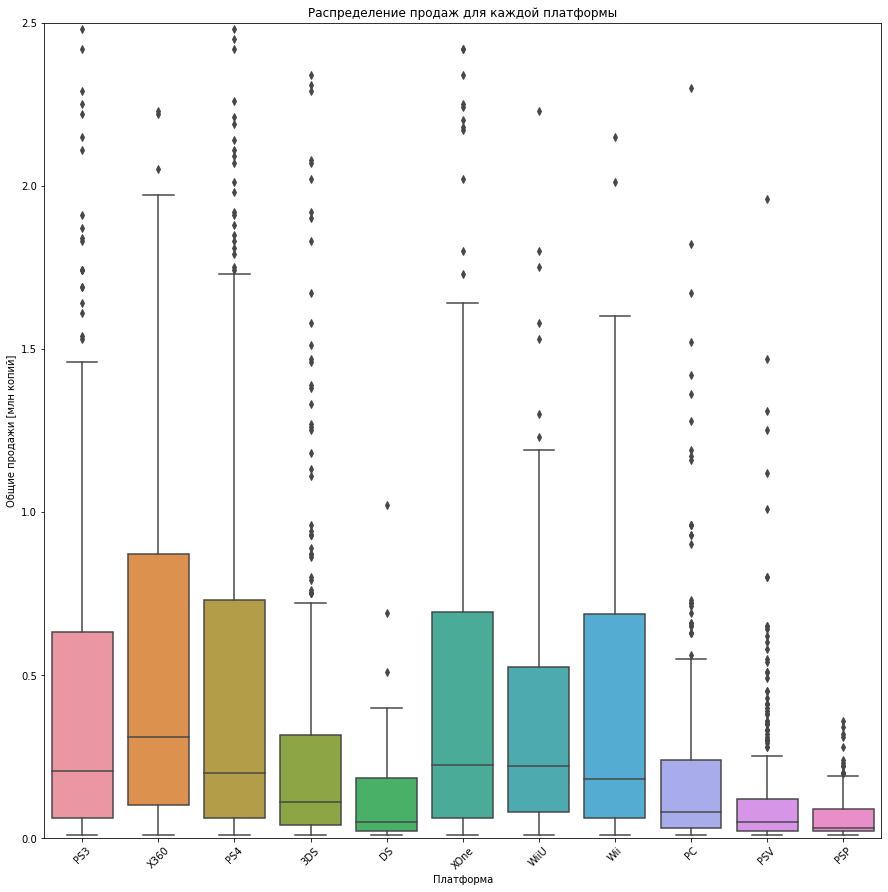

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,395.00,31.00,250.00,480.00,388.00,172.00,409.00,54.00,147.00,292.00,244.00
mean,0.49,0.40,0.25,0.60,0.81,0.06,0.12,0.65,0.56,0.81,0.65
std,1.39,1.44,0.49,1.48,1.62,0.07,0.20,1.17,1.06,1.71,1.04
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.04,0.02,0.03,0.06,0.06,0.02,0.02,0.06,0.08,0.10,0.06
50%,0.11,0.05,0.08,0.20,0.20,0.03,0.05,0.18,0.22,0.31,0.22
75%,0.32,0.18,0.24,0.63,0.73,0.09,0.12,0.69,0.52,0.87,0.69
max,14.60,8.06,5.14,21.05,14.63,0.36,1.96,6.76,7.09,16.27,7.39


In [33]:
# Строим коробчатую диаграмму (boxplot) для отображения распределения продаж по платформам
f, ax = plt.subplots(figsize=(15, 15))  # Создаем фигуру и ось

fig = sns.boxplot(x='platform', y='total_sales', data=actual_df, ax=ax)

# Настройки графика
fig.set_title("Распределение продаж для каждой платформы")
ax.set_ylim(0, 2.5)  # Ограничиваем диапазон оси Y
# Задание название осей
ax.set_xlabel("Платформа")
ax.set_ylabel("Общие продажи [млн копий]")

# Поворачиваем подписи на оси X (названия платформ) на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

# Показ графика
plt.show()

actual_df.groupby('platform')['total_sales'].describe().round(2).T

**Вывод:** Анализируя график `«ящик с усами»` и статистические данные можно сделать несколько выводов:

- Платформы `X360`, `PS3`, `XOne`, `PS4` и `Wii` демонстрируют широкий диапазон продаж с высокими максимальными значениями и множеством выбросов, что свидетельствует о наличии игр с особенно высокими продажами. А медианное значение близко к 0.2 млн.
- У таких платформ, как `PSV` и `PSP`, значительно более низкие медианные значения (~ 0.04) и общий уровень продаж по сравнению с другими.
- Платформы `DS` и `PC` имеют более узкое распределение, что означает, что их продажи более стабильны и имеют меньше крайних значений.

<a class="anchor" id="3.6-bullet"></a>
### Как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков.

**Влияние отзывов пользователей**

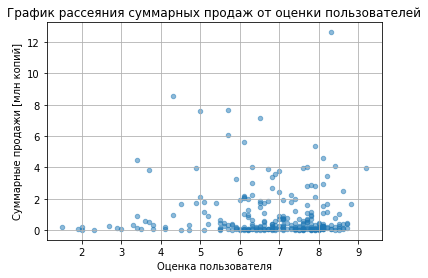

"коэффициент корреляции для столбцов 'total_sales' и 'user_score' равен -0.03"

In [34]:
ps4_df = actual_df.query('platform == "PS4"')

ps4_df.plot.scatter(x='user_score', y='total_sales', alpha=0.5, grid=True)
plt.title("График рассеяния суммарных продаж от оценки пользователей")
plt.xlabel('Оценка пользователя')
plt.ylabel('Суммарные продажи [млн копий]')
plt.show()

#посчитаем коэффициент корреляции 
corr_coef = ps4_df['user_score'].corr(ps4_df['total_sales'])
(f"коэффициент корреляции для столбцов 'total_sales' и 'user_score' равен {corr_coef:.2f}")

**Влияние отзывов критиков**

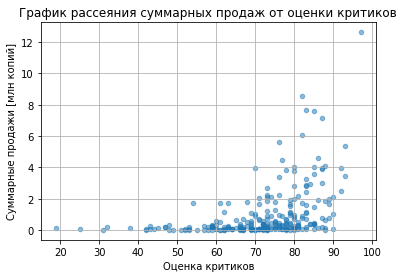

"коэффициент корреляции для столбцов 'total_sales' и 'critic_score' равен 0.41"

Коэффициент корреляции для оценок больше 60: 0.45
Коэффициент корреляции для оценок 60 и ниже: 0.16


In [35]:
ps4_df.plot.scatter(x='critic_score', y='total_sales', alpha=0.5, grid=True)
plt.title("График рассеяния суммарных продаж от оценки критиков")
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи [млн копий]')
plt.show()

#посчитаем коэффициент корреляции 
corr_coef = ps4_df['critic_score'].corr(ps4_df['total_sales'])
display(f"коэффициент корреляции для столбцов 'total_sales' и 'critic_score' равен {corr_coef:.2f}")

# Фильтрация данных для оценок выше 60
above_60 = ps4_df[ps4_df['critic_score'] > 60]
correlation_above_60 = above_60['critic_score'].corr(above_60['total_sales'])

# Фильтрация данных для оценок ниже или равно 60
below_60 = ps4_df[ps4_df['critic_score'] <= 60]
correlation_below_60 = below_60['critic_score'].corr(below_60['total_sales'])

# Вывод результатов
print(f"Коэффициент корреляции для оценок больше 60: {correlation_above_60:.2f}")
print(f"Коэффициент корреляции для оценок 60 и ниже: {correlation_below_60:.2f}")

**Вывод:**

- Влияние оценки пользователей на конечные продажи игры не замечено, что подтверждает коэф. корреляции Пирсона равный `-0.03`;
- Влияние плохой оценки критиков на конечные продажи игры не замечено, но хорошие оценки слабо повышают конечные продажи игры.

<a class="anchor" id="3.7-bullet"></a>
### Как влияют на продажи отзывы пользователей и критиков для других платформ.

In [36]:
# Рассчитываем коэффициенты корреляции для всех платформ
#correlation_matrix = actual_df.query('platform != "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

# Выводим коэффициенты корреляции
#print("Коэффициент корреляции Пирсона для всех платформ:")
#print(correlation_matrix.round(2))

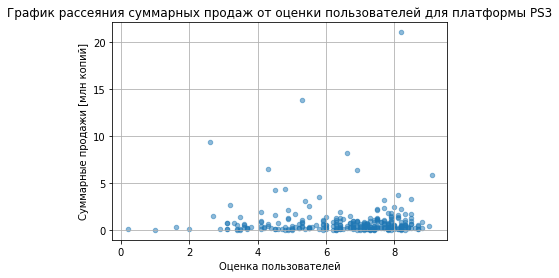

"коэффициент корреляции для столбцов 'total_sales' и 'user_score' платформы PS3 равен -0.01"

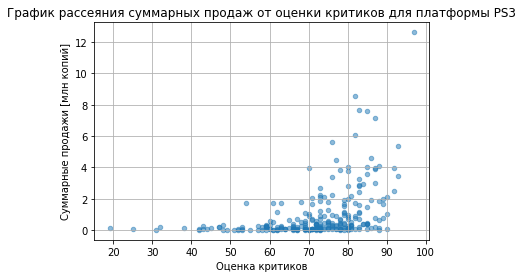

"коэффициент корреляции для столбцов 'total_sales' и 'critic_score' платформы PS3 равен 0.33"

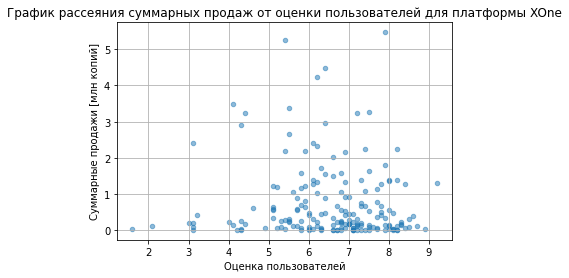

"коэффициент корреляции для столбцов 'total_sales' и 'user_score' платформы XOne равен -0.06"

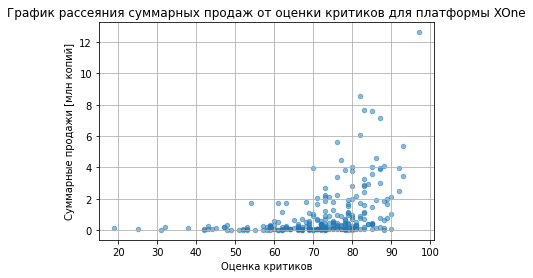

"коэффициент корреляции для столбцов 'total_sales' и 'critic_score' платформы XOne равен 0.42"

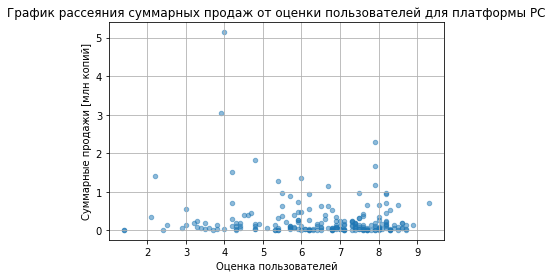

"коэффициент корреляции для столбцов 'total_sales' и 'user_score' платформы PC равен -0.12"

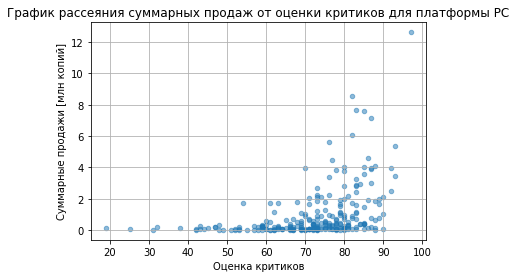

"коэффициент корреляции для столбцов 'total_sales' и 'critic_score' платформы PC равен 0.24"

0.33

In [37]:
platforms = ['PS3', 'XOne', 'PC']
corr_coef_critic_list = []

for platform in platforms:
    platform_df = actual_df.query('platform == @platform')

    platform_df.plot.scatter(x='user_score', y='total_sales', alpha=0.5, grid=True)
    plt.title(f"График рассеяния суммарных продаж от оценки пользователей для платформы {platform}")
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи [млн копий]')
    plt.show()

    #посчитаем коэффициент корреляции 
    corr_coef = platform_df['user_score'].corr(platform_df['total_sales'])
    display(f"коэффициент корреляции для столбцов 'total_sales' и 'user_score'"
     f" платформы {platform} равен {corr_coef:.2f}")
    ps4_df.plot.scatter(x='critic_score', y='total_sales', alpha=0.5, grid=True)
    plt.title(f"График рассеяния суммарных продаж от оценки критиков для платформы {platform}")
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи [млн копий]')
    plt.show()

    #посчитаем коэффициент корреляции 
    corr_coef = platform_df['critic_score'].corr(platform_df['total_sales'])
    display(f"коэффициент корреляции для столбцов 'total_sales' и 'critic_score'"
            f" платформы {platform} равен {corr_coef:.2f}")
    corr_coef_critic_list.append(corr_coef)
    
display(np.mean(corr_coef_critic_list).round(2))

**Вывод:**   
- Для платформы `PS3`;
    - Влияние оценки пользователей на конечные продажи игры не замечено, что подтверждает коэф. корреляции Пирсона равный `-0.01`;
    - Присутстсвует слабая положительная корреляция влияния оценки критиков на конечные продажи игры, что подтверждает коэф. корреляции Пирсона равный `0.33`;
- Для платформы `XOne`;
    - Влияние оценки пользователей на конечные продажи игры не замечено, что подтверждает коэф. корреляции Пирсона равный `-0.07`;
    - Присутстсвует слабая положительная корреляция влияния оценки критиков на конечные продажи игры, что подтверждает коэф. корреляции Пирсона равный `0.42`;
- Для платформы `PС`;
    - Влияние оценки пользователей на конечные продажи игры не замечено, что подтверждает коэф. корреляции Пирсона равный `-0.12`;
    - Присутстсвует очень слабая положительная корреляция влияния оценки критиков на конечные продажи игры, что подтверждает коэф. корреляции Пирсона равный `0.24`;
    
**Подведя итоги:**  
Влияние оценок пользователей не влияет на итоговые продажи. Влияние оценок критиков немного помогает увеличить итоговые продажи.

<a class="anchor" id="3.8-bullet"></a>
### Общее распределение игр по жанрам

Для отображения распределения итоговых продаж (прибыли) между разными группами лучше всего подойдет `Boxplot (ящиковая диаграмма)` ей и воспользуемся

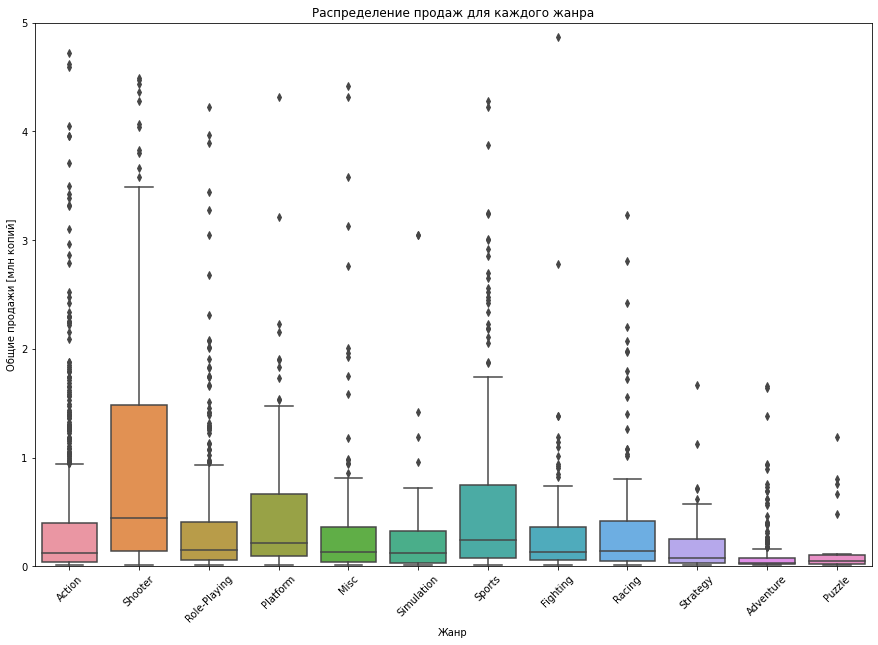

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,1016.00,302.00,109.00,187.00,85.00,28.00,115.00,368.00,234.00,80.00,267.00,71.00
mean,0.43,0.10,0.41,0.45,0.72,0.17,0.47,0.52,1.30,0.44,0.68,0.19
std,1.17,0.21,0.91,1.09,1.36,0.31,0.89,1.32,2.26,1.24,1.14,0.27
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.04,0.02,0.06,0.04,0.09,0.02,0.05,0.06,0.14,0.03,0.08,0.03
50%,0.12,0.03,0.13,0.13,0.21,0.04,0.14,0.15,0.44,0.12,0.24,0.08
75%,0.40,0.08,0.36,0.36,0.66,0.10,0.42,0.41,1.48,0.33,0.74,0.25
max,21.05,1.66,7.55,9.18,9.90,1.19,7.09,14.60,14.63,9.17,8.58,1.67


In [38]:
# Строим коробчатую диаграмму (boxplot) для отображения распределения продаж по платформам
f, ax = plt.subplots(figsize=(15, 10))  # Создаем фигуру и ось

fig = sns.boxplot(x='genre', y='total_sales', data=actual_df, ax=ax)

# Настройки графика
fig.set_title("Распределение продаж для каждого жанра")
ax.set_xlabel("Жанр")
ax.set_ylabel("Общие продажи [млн копий]")
ax.set_ylim(0, 5)  # Ограничиваем диапазон оси Y

# Поворачиваем подписи на оси X (названия платформ) на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

# Показ графика
plt.show()

actual_df.groupby('genre')['total_sales'].describe().round(2).T

In [39]:
actual_genre = actual_df.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=['sum', 'mean', 'median']
)

actual_genre.columns = ['sum', 'mean', 'median']

actual_genre.sort_values(by='sum', ascending=False)

,sum,mean,median
genre,,,
Action,440.29,0.433356,0.120
Shooter,304.67,1.302009,0.440
Role-Playing,192.68,0.523587,0.145
Sports,181.06,0.678127,0.240
Misc,84.93,0.454171,0.130
Platform,61.00,0.717647,0.210
Racing,53.50,0.465217,0.140
Fighting,44.49,0.408165,0.130
Simulation,35.12,0.439000,0.120


**Вывод:**

В жанре Action много выбросов (очень прибыльных игр). Из-за этого общая прибыль по жанру Action выше остальных. Но медианное самое высокое в жанре Shooter.  
Наименее прибыльны интелектуальные игры, такие как пазлы и стратегии.

**Общий вывод:**

- Если анализ требует понимания исторического контекста, долгосрочных трендов или сравнения с прошлыми периодами, данные за все эры будут важны. Однако, если цель анализа — текущие или недавние тренды, то можно сосредоточиться на данных за последние несколько лет;
- Из всех платформ потенциально наиболее прибыльными являются **PS4** и **XOne**, эти платформы были выпущены в 2013 году (учитывая жизнь платформы ~ 7 лет), то на 2017 год данные платформы находятся на экваторе своего развития.
- Успешность игры зависит от платформы на которой она выпускается. Успешные платформы для выпуска **PS4** и **XOne**.
- Влияние оценок пользователей на общую прибыльность игры не существует.
- Влияние оценок критиков на общую прибыльность игры есть, прослеживается слабая положительная корреляция.
- Для выпуска успешной игры нужно целиться в жанры `Action`, `Shooter`, `Role-Playing` или `Sports`.

<a class="anchor" id="4-bullet"></a>
## Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

In [40]:
regions = ['eu_sales', 'na_sales', 'jp_sales']

<a class="anchor" id="4.1-bullet"></a>
###  Самые популярные платформы (топ-5).

In [41]:
def create_top5_platforms_column(df, region_column, new_column_name='platform_top5', top_n=5, other_name='Другие_платформы'):
    """
    Создает новый столбец с топ-5 платформами и группирует остальные как 'Другие'.
    """
    # Находим топ-N платформ по продажам
    top_platforms = df.groupby('platform')[region_column].sum().nlargest(top_n).index

    # Создаем новый столбец
    df[new_column_name] = df['platform'].apply(lambda x: x if x in top_platforms else other_name)

    return df

for region in regions:
    # Вызов функции с использованием названия региона как имени столбца
    platform_sales = create_top5_platforms_column(actual_df, region, new_column_name=f'platform_top5_{region}')
    # Проверка уникальных значений в новом столбце
    unique_values = platform_sales[f'platform_top5_{region}'].unique()
    print(f"Уникальные значения для {region}: {unique_values}")

Уникальные значения для eu_sales: ['PS3' 'X360' 'PS4' '3DS' 'Другие_платформы' 'XOne']
Уникальные значения для na_sales: ['PS3' 'X360' 'PS4' '3DS' 'Другие_платформы' 'XOne']
Уникальные значения для jp_sales: ['PS3' 'Другие_платформы' 'PS4' '3DS' 'WiiU' 'PSV']


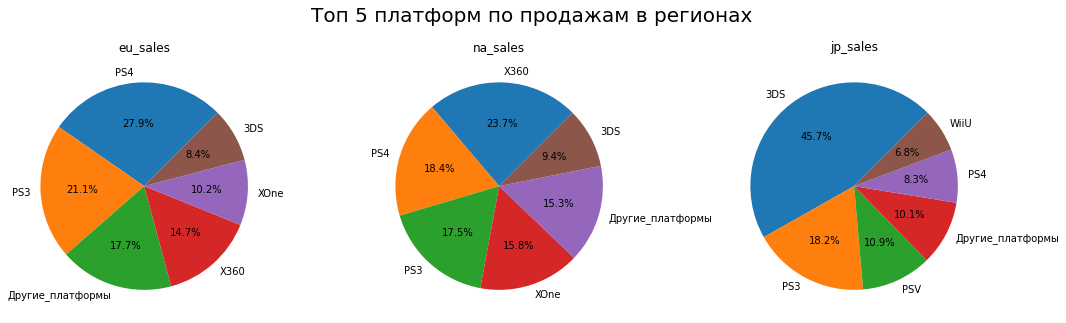

In [42]:
num_regions = len(regions)

# Создание подграфиков
fig, ax = plt.subplots(1, num_regions, figsize=(15, 6))  # 1 ряд и num_regions колонок

# Проходим по каждому региону
for i, region in enumerate(regions):
    # Суммируем продажи по платформам для каждого региона
    platform_sales = actual_df.groupby(by=f'platform_top5_{region}').agg({region: 'sum'}).sort_values(by=region, ascending=False)
    # Строим круговую диаграмму
    ax[i].pie(platform_sales[region], labels=platform_sales.index, autopct='%1.1f%%', startangle=45)
    ax[i].set_title(f'{region}')

# Настройка общего заголовка графика
plt.suptitle("Топ 5 платформ по продажам в регионах", fontsize=20)
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Оптимизация пространства между подграфиками
plt.show()

**Вывод:** 

Предпочтение пользователей Северной Америки и Европы схожи но можно заметить, что в NA платформы Microsft (`XOne` и `X360`) имеют паритет с платформами Sony (`PS4` и `PS3`), в отличии от EU, где платформы Sony более популярны.  
В Японии самыми популярными оказались платформы Nintendo (`3DS` и `WiiU`)

<a class="anchor" id="4.2-bullet"></a>
### Самые популярные жанры (топ-5)

In [43]:
def create_top5_genres_column(df, region_column, new_column_name='genre_top5', top_n=5, other_name='Другие_жанры'):
    """
    Создает новый столбец с топ-5 жанрами и группирует остальные как 'Другие'.
    """
    # Находим топ-N жанров по продажам
    top_genres = df.groupby('genre')[region_column].sum().nlargest(top_n).index

    # Создаем новый столбец
    df[new_column_name] = df['genre'].apply(lambda x: x if x in top_genres else other_name)

    return df

for region in regions:
    # Вызов функции с использованием названия региона как имени столбца
    genres_sales = create_top5_genres_column(actual_df, region, new_column_name=f'genre_top5_{region}')
    # Проверка уникальных значений в новом столбце
    unique_values = genres_sales[f'genre_top5_{region}'].unique()
    print(f"Уникальные значения для {region}: {unique_values}")

Уникальные значения для eu_sales: ['Action' 'Shooter' 'Role-Playing' 'Другие_жанры' 'Sports' 'Racing']
Уникальные значения для na_sales: ['Action' 'Shooter' 'Role-Playing' 'Другие_жанры' 'Misc' 'Sports']
Уникальные значения для jp_sales: ['Action' 'Другие_жанры' 'Role-Playing' 'Misc' 'Simulation' 'Fighting']


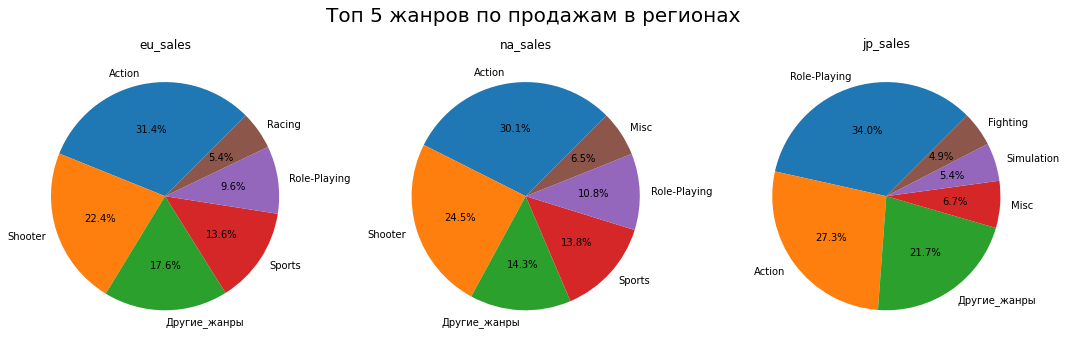

In [44]:
# Создание подграфиков
fig, ax = plt.subplots(1, num_regions, figsize=(15, 6))  # 1 ряд и num_regions колонок

# Проходим по каждому региону
for i, region in enumerate(regions):
    # Суммируем продажи по платформам для каждого региона
    genres_sales = actual_df.groupby(by=f'genre_top5_{region}').agg({region: 'sum'}).sort_values(by=region, ascending=False)
    # Строим круговую диаграмму
    ax[i].pie(genres_sales[region], labels=genres_sales.index, autopct='%1.1f%%', startangle=45)
    ax[i].set_title(f'{region}')

# Настройка общего заголовка графика
plt.suptitle("Топ 5 жанров по продажам в регионах", fontsize=20)
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Оптимизация пространства между подграфиками
plt.show()

**Вывод:**

На диаграммах видно, что предпочтения для EU и NA региона схожи, (есть незначительное отличие в 5 месте: у EU это Racing, NA это Misc).
У JP региона предпочтения иные. Это связано в различиях между европейской и азиатской культурами.

<a class="anchor" id="4.3-bullet"></a>
### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

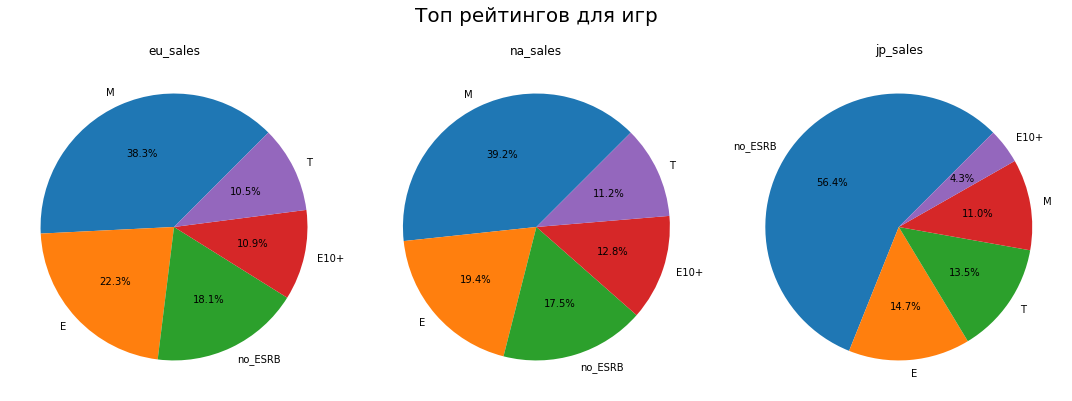

In [45]:
# Создание подграфиков
fig, ax = plt.subplots(1, num_regions, figsize=(15, 6))  # 1 ряд и num_regions колонок

# Проходим по каждому региону
for i, region in enumerate(regions):
    # Суммируем продажи по рейтингу для каждого региона
    platform_sales = actual_df.groupby(by='rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).head(5)
    
    # Строим круговую диаграмму
    ax[i].pie(platform_sales[region], labels=platform_sales.index, autopct='%1.1f%%', startangle=45)
    ax[i].set_title(f'{region}')

# Настройка общего заголовка графика
plt.suptitle("Топ рейтингов для игр", fontsize=20)
plt.tight_layout(rect=[0, 0.01, 1, 1])  # Оптимизация пространства между подграфиками
plt.show()

**Вывод**: 

**Северной Америке и Европе** ситуация одинакова. Первую пятерку составляют игры рейтинга М("Для взрослых"), E("Для всех"), no_ESRB("Игры без рейтинга ESRB"), E10+("Для всех от 10 лет и старше"), T("Подросткам").  
В **Японии** с огромным преимуществом лидируют RP("Игры без рейтинга"). Причина этого, из-за того что в Японском регионе присвоением игре возрастного рейтинга занимается другая организация. 

*Справка:* (Computer Entertainment Rating Organization (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии).

**Общий вывод:**

Следует понимать на какой рынок расчитывается игра. Понимание этого фактора помогает подобрать жанр, платформу и рейтинг для лучшего продвижения.

<a class="anchor" id="5-bullet"></a>
## Проверьте гипотезы

<a class="anchor" id="5.1-bullet"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая и альтернативная гипотезы (Н0 и H1) чаще всего формулируется в виде «параметр ГС равен некоторому числу», тогда для альтернативной гипотезы нужно выбрать оставшийся вариант:
- параметр ГС не равен числу из Н0 — двусторонняя H1
- параметр ГС больше числа из Н0 — правосторонняя H1
- параметр ГС меньше числа из Н0 — левосторонняя H1.

Сформулируем нулевую и анльтернативную гипотезы:
- Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Если выборок две, они независимы, и их дисперсии полагаются равными, то используется «Двухвыборочный t-тест для независимых выборок» `st.ttest_ind`. Как в нашем случае.

In [46]:
# Выборка для платформы XOne
xbox_one = actual_df.query('platform == "XOne" and user_score.notnull()')['user_score']
# Выборка для платформы PC
pc = actual_df.query('platform == "PC" and user_score.notnull()')['user_score']

In [47]:
# Выполнение t-теста для двух независимых выборок
results = st.ttest_ind(
    xbox_one,  # Рейтинги пользователей для XOne
    pc,  # Рейтинги пользователей для PC
)

# Вывод p-value
print(f"{results.pvalue:.2f}")

# Уровень значимости (alpha = 5%)
alpha = 0.05

# Если p-value меньше уровня значимости (0.05), отвергаем нулевую гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')  # Средний пользовательский рейтинг платформ Xbox One и PC различается
else:
    print('Не получилось отвергнуть нулевую гипотезу')  # Нет статистически значимого различия

0.61
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет

<a class="anchor" id="5.2-bullet"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и анльтернативную гипотезы:
- H0: Средние пользовательские рейтинги жанров Action и Sports равны
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются 

Если выборок две, они независимы, и их дисперсии полагаются равными, то используется «Двухвыборочный t-тест для независимых выборок» `st.ttest_ind`. Как в нашем случае.

In [48]:
# Выборка для платформы XOne
action = actual_df.query('genre == "Action" and user_score.notnull()')['user_score']
# Выборка для платформы PC
sport = actual_df.query('genre == "Sports" and user_score.notnull()')['user_score']

In [49]:
# Выполнение t-теста для двух независимых выборок
results = st.ttest_ind(
    action,  # Рейтинги пользователей для Action
    sport,  # Рейтинги пользователей для Sports
)

# Вывод p-value
print(f"{results.pvalue:.2f}")

# Уровень значимости (alpha = 5%)
alpha = 0.05

# Если p-value меньше уровня значимости (0.05), отвергаем нулевую гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')  # Средние пользовательские рейтинги жанров Action и Sports различаются
else:
    print('Не получилось отвергнуть нулевую гипотезу')  # Нет статистически значимого различия

0.00
Отвергаем нулевую гипотезу


In [50]:
print('Средний пользовательский рейтинг жанра экшен', round(action.mean(), 3))
print('Средний пользовательский рейтинг жанра спортивных игр', round(sport.mean(), 3))

Средний пользовательский рейтинг жанра экшен 6.827
Средний пользовательский рейтинг жанра спортивных игр 5.456


**Вывод**: Нулевая гипотеза отвергнута, Средние пользовательские рейтинги жанров Action и Sports, статистически значимо  отличаются, при установленном уровне значимости в 5 %.

<a class="anchor" id="6-bullet"></a>
## Общий вывод

В процессе исследования данных было выполнено:
1. Первоначальное изучение полученного для работы датафрейма.
2. Проведена предобработка данных:
    - Замено название столбцов (приведено к нижнему регистру).
    - Преобразованы данные в нужные типы. Описано, в каких столбцах произошла замена типа данных и почему.
    - Посчитаны общие продажи по регионам.
    - Обработаны пропуски там где это возможно.
3. Проведен исследовательский анализ данных:
    - Если анализ требует понимания исторического контекста, долгосрочных трендов или сравнения с прошлыми периодами, данные за все эры будут важны. Однако, если цель анализа — текущие или недавние тренды, то можно сосредоточиться на данных за последние несколько лет;
    - Из всех платформ потенциально наиболее прибыльными являются **PS4** и **XOne**, эти платформы были выпущены в 2013 году (учитывая жизнь платформы ~ 7 лет), то на 2017 год данные платформы находятся на экваторе своего развития.
    - Успешность игры зависит от платформы на которой она выпускается. Успешные платформы для выпуска **PS4** и **XOne**.
    - Влияние оценок пользователей на общую прибыльность игры не существует.
    - Влияние оценок критиков на общую прибыльность игры есть, прослеживается слабая положительная корреляция.
    - Для выпуска успешной игры нужно целиться в жанры `Action`, `Shooter`, `Role-Playing` или `Sports`.
4. Были проанализированы суммарные продажи для 3-х регионов (EU, NA, JP) в зависимости от:
    - Платформ.
    - Жанров.
    - Рейтинга ESRB
5. Были составлены и проверены гипотезы для:
    - Среднего пользовательского рейтинга платформ Xbox One и PC.
    - Средние пользовательского рейтинга жанров Action и Sports.
    
**Исходя из выше перечисленного** можно составить модель **прибыльной игры** на 2017 год:  
- Игра должна выходить на платформы **PS4** и **XOne**.
- Жанр игры должен быть похож на один из списка (`Action`, `Shooter`, `Role-Playing`, `Sports`).
- Рейтинг игры должен быть для взрослых.

[Назад к содержанию](#0-bullet)